## PyTorch Data Preprocess

In [4]:
import os
from glob import glob

import torch
from torchvision import datasets, transforms # dataset 예제 변환, transform 예제 변환을 줌


### Data Loader 부르기
파이토치는 DataLoader 를 불러 model 에 넣음

- 이미 데이터를 다운 받았으면, 로드가 안되고 아니면 로드가 됨

In [5]:
# batch 사이즈를 데이터 로드에 직접 넣어줌

batch_size = 32
test_batch_size =32

In [7]:
# train 용도 이므로 True , 로컬에 데이터가 없으면 download 받을 것이므로 True
# 데이터를 변경시켜줄것이므로, 아래처럼 처리 
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train = True , download= True,
                  transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize(mean = (0.5,) , std = (0.5,))
                  ])),

    batch_size = batch_size,
    shuffle  = True) 

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

Processing...
Done!


/Users/hwajeong/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train = False,
                    transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5))
                    ])),
    batch_size = batch_size,
    shuffle = True)

### 첫번째 iteration에서 나오는 데이터 확인

텐서플로우는 [ 배치사이즈, height , width , 채널 ] , 
토치 [ 배치사이즈 , 채널(channel) , height, width ] 

둘의 순서가 다르다. 

In [10]:
images, labels = next(iter(train_loader))
images.shape

torch.Size([32, 1, 28, 28])

In [11]:
labels.shape

torch.Size([32])

### 데이터 시각화

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
images[0].shape

torch.Size([1, 28, 28])

In [14]:
torch_image = torch.squeeze(images[0]) # 0 번째를 없애준다. 
torch_image.shape

torch.Size([28, 28])

In [15]:
# 토치를 넘파이화 해줌 
image = torch_image.numpy()
image.shape

(28, 28)

In [17]:
label = labels[0].numpy()
label.shape

()

In [21]:
label

array(5)

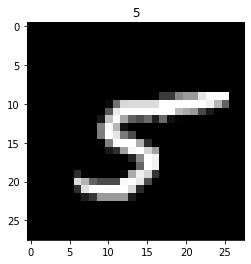

In [22]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()